These have been executed on Google Collab, due to the usage of CUDA. Hence you can see me downloading datasets from github

In [2]:
!wget -O train.csv https://raw.githubusercontent.com/Arnax308/Stock-Market-Prediction/refs/heads/main/Datasets/test_binary_class.csv
!wget -O test.csv https://raw.githubusercontent.com/Arnax308/Stock-Market-Prediction/refs/heads/main/Datasets/test_binary_class.csv

--2024-10-30 20:14:49--  https://raw.githubusercontent.com/Arnax308/Stock-Market-Prediction/refs/heads/main/Datasets/test_binary_class.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31953 (31K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  31.20K  --.-KB/s    in 0s      

2024-10-30 20:14:50 (98.6 MB/s) - ‘train.csv’ saved [31953/31953]

--2024-10-30 20:14:50--  https://raw.githubusercontent.com/Arnax308/Stock-Market-Prediction/refs/heads/main/Datasets/test_binary_class.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443...

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-10-30 20:14:57.026509: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-30 20:14:57.036255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-30 20:14:57.049803: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-30 20:14:57.049833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-30 20:14:57.058914: I tensorflow/core/platform/cpu_feature_gua

In [2]:
!ls

Binary_Classification_attempt_with_articles.ipynb   test.csv
Binary_Classification_attempt_with_summaries.ipynb  train.csv


In [3]:
df= pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
uni_df = pd.concat([df, test_df])

In [5]:
uni_df.head()

,Headlines,Article,Companies,Sectors,Interest
0,Atos reaches deal with creditors on debt restr...,French technology company Atos reached an agr...,Atos,Information Technology,0
1,Saudi Aramco awards $25 billion in contracts f...,Saudi Aramco has awarded $25 billion in contra...,Saudi Aramco,Energy,0
2,Bank of Baroda gets Rs 1067.82 crore income ta...,Bank of Baroda received a tax demand of ₹1067....,Bank of Baroda,Banking,0
3,Air India Express union alleges unfair labour ...,"Air India Express’ cabin crew union, AIXEU, ha...",Air India Express,Airlines,0
4,"Punjab & Sind Bank plans to raise Rs 2,000 cro...","Punjab & Sind Bank plans to raise ₹2,000 crore...",Punjab & Sind Bank,Banking,1


In [6]:
X = uni_df['Article']
y = uni_df['Interest'].values

In [7]:
token = Tokenizer()
token.fit_on_texts(X)
word_indices = token.texts_to_sequences(X)

In [8]:
print(word_indices[0])

[635, 636, 22, 336, 337, 20, 119, 13, 3, 34, 6, 637, 4, 638, 7, 639, 9, 12, 170, 120, 1, 22, 29, 7, 640, 1, 120, 338, 339, 3, 641, 41, 642, 643, 41, 340, 121, 3, 171, 62, 13, 233, 644, 122, 32, 29, 5, 3, 172, 234, 31, 35, 48, 235, 6, 341, 170, 18, 52, 645, 342, 96, 236, 1, 237, 646, 6, 647, 170, 2, 31, 36, 48, 235, 23, 18, 123, 341, 49, 648, 11, 173, 25, 15, 48, 235, 1, 172, 29, 1, 22, 29, 649, 119, 42, 3, 238, 650, 651, 652, 3, 653, 120, 119, 11, 174, 336, 63, 97, 654, 23, 3, 655, 124, 11, 656, 657, 658, 659, 98, 660, 26, 661, 7, 12, 120]


In [9]:
vocab = token.word_index
len(vocab)

1497

In [10]:
print(vocab)

{'the': 1, 'to': 2, 'a': 3, 'and': 4, 'in': 5, 'of': 6, 'on': 7, 'rs': 8, 'for': 9, 'crore': 10, 'by': 11, 'its': 12, 'with': 13, 'has': 14, '1': 15, 'is': 16, 'at': 17, 'will': 18, 'india': 19, 'an': 20, 'year': 21, 'company': 22, 'that': 23, 'this': 24, '3': 25, 'from': 26, 'bank': 27, 'stake': 28, 'said': 29, 'june': 30, '2': 31, 'it': 32, '0': 33, 'group': 34, '8': 35, '9': 36, '7': 37, '000': 38, 'price': 39, 'percent': 40, 'million': 41, 'was': 42, 'over': 43, 'as': 44, 'shares': 45, '5': 46, 'deal': 47, 'billion': 48, 'net': 49, 'through': 50, 'stock': 51, 'be': 52, 'gas': 53, '4': 54, 'reported': 55, '24': 56, 'growth': 57, 'up': 58, '27': 59, 'aims': 60, 'adani': 61, 'increase': 62, 'announced': 63, 'plans': 64, '6': 65, 'share': 66, 'nse': 67, '25': 68, 'demand': 69, 'profit': 70, 'which': 71, 'according': 72, 'across': 73, 'rose': 74, 'board': 75, 'filing': 76, 'per': 77, 'market': 78, 'block': 79, 'restaurants': 80, 'union': 81, 'members': 82, 'services': 83, 'employees': 8

In [11]:
print(max(len(i) for i in word_indices))

296


In [12]:
max_len = max(len(i) for i in word_indices)
word_indices_padded = pad_sequences(word_indices, maxlen=max_len, padding='post')
word_indices_np_padded = np.array(word_indices_padded)

In [13]:
max_len

296

In [14]:
one_hot_encoded = token.texts_to_matrix(X, mode='binary')

In [15]:
one_hot_encoded.shape

(86, 1498)

In [16]:
len(one_hot_encoded[0])

1498

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = np.asarray(y).astype('float32')

In [19]:
x_train, x_hold, y_train, y_hold = train_test_split(one_hot_encoded,y, test_size = 0.3, random_state = 42)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [21]:
input_shape = (1498,)
model = Sequential([
    Input(shape=input_shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

2024-10-30 20:14:25.477398: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-30 20:14:25.503973: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-30 20:14:25.504139: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1]:
history = model.fit(x_train, y_train, epochs=15);

NameError: name 'model' is not defined

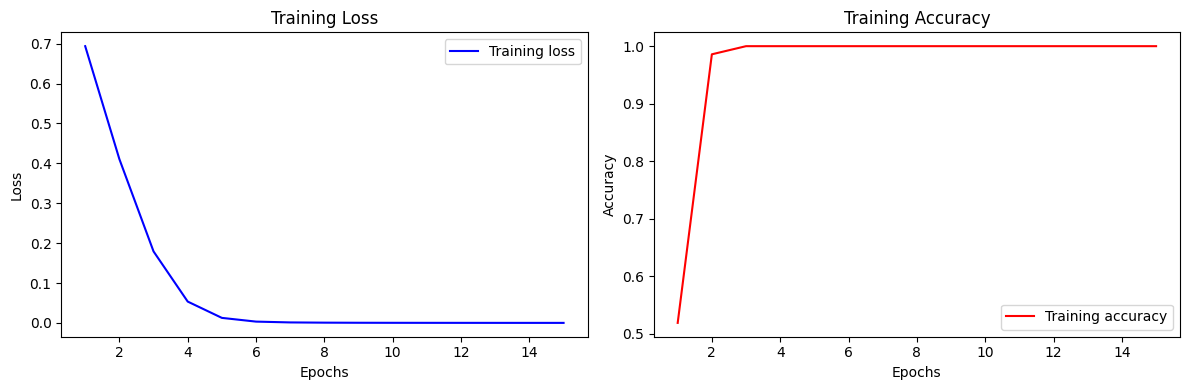

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1, len(loss) + 1)

# Plotting the loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(x_hold)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
y_pred_prob.shape

(91, 1)

In [ ]:
threshold = 0.6

# Convert probabilities to class labels
y_pred_class = (y_pred_prob >= threshold).astype(int)

In [ ]:
accuracy = np.mean(y_pred_class == y_hold.reshape(-1, 1))
accuracy

0.7472527472527473

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_hold, y_pred_class)

In [ ]:
cm

array([[45,  2],
       [21, 23]])

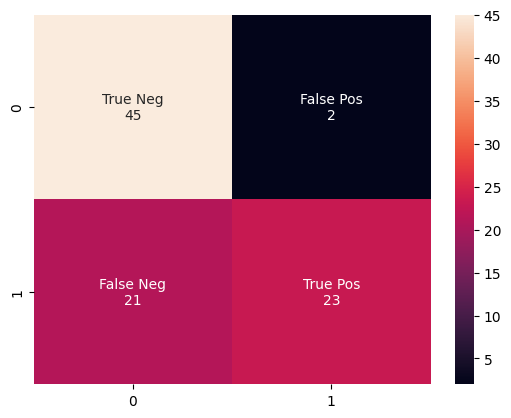

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='');
#Left side is actual labels and the one at the bottom predicted

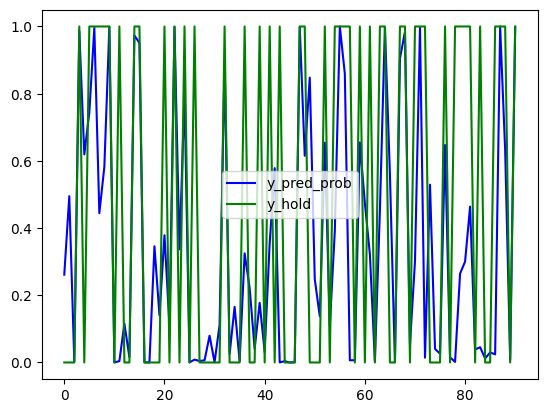

In [ ]:
plt.plot(y_pred_prob, label='y_pred_prob', color='blue')
plt.plot(y_hold, label='y_hold', color='green');
plt.legend();

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_hold, y_pred_class)
recall = recall_score(y_hold, y_pred_class)
f1 = f1_score(y_hold, y_pred_class)
roc_auc = roc_auc_score(y_hold, y_pred_prob)

In [ ]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Precision: 0.9200
Recall: 0.5227
F1 Score: 0.6667
ROC AUC: 0.8211
